In [1]:
import openai

In [5]:
import os

In [8]:
import requests

In [2]:
from dotenv import dotenv_values
config = dotenv_values(".env")

In [3]:
openai.api_key = config["OPENAI_API_KEY"]

## Making a DALL-E API request

In [9]:
res = openai.Image.create(
    # prompt="an astronaut lounging in a tropical resort in space, pixel art",
    prompt="a mermaid swimming in a coral city, digital art",
    size="256x256",
    n=1
)

In [10]:
image_url = res["data"][0]["url"]

## Saving DALL-E images

In [4]:
def save_image(url, image_name):
    image_directory_name = "images"
    image_directory = os.path.join(os.curdir, image_directory_name)

    if not os.path.isdir(image_directory):
        os.mkdir(image_directory)
    
    image_filepath = os.path.join(image_directory, image_name)
    image_content = requests.get(url).content

    with open(image_filepath, "wb") as image_file:
        image_file.write(image_content)


In [20]:
save_image(image_url, "mermaid.png")

In [14]:
from IPython.display import Image

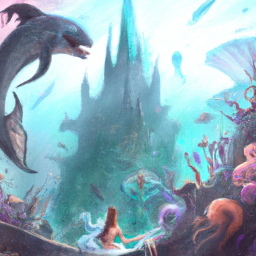

In [22]:
Image(filename=image_filepath)

In [23]:
def get_image(prompt, image_name):
    res = openai.Image.create(
            prompt=prompt,
            size="256x256",
            n=1
        )
    image_url = res["data"][0]["url"]
    save_image(image_url, image_name)

In [24]:
get_image(prompt="an astronaut lounging in a tropical resort in space, pixel art", image_name="astronaut.png")

## Using JSON to save DALL-E images

In [26]:
import base64

In [27]:
def get_and_save_image(prompt, image_name):
    res = openai.Image.create(
            prompt=prompt,
            size="256x256",
            n=1,
            response_format="b64_json"
        )
    image_content = res["data"][0]["b64_json"]

    image_directory_name = "images"
    image_directory = os.path.join(os.curdir, image_directory_name)

    if not os.path.isdir(image_directory):
        os.mkdir(image_directory)
    
    image_filepath = os.path.join(image_directory, image_name)

    decoded_img = base64.b64decode(image_content)

    with open(image_filepath, "wb") as image_file:
        image_file.write(decoded_img)


In [ ]:
get_and_save_image("a friendly cactus sitting in a pot, digital art", "cactus.png")

## Requesting image variations

In [6]:
res = openai.Image.create_variation(
    image=open("./images/mermaid.png", "rb"),
    n=1
)

In [9]:
for idx, img in enumerate(res["data"]):
    save_image(img["url"], f"mermaid-{idx}.png")

In [10]:
res = openai.Image.create(
            prompt="A photo of a white fur monster standing in a purple room",
            size="256x256",
            n=2
        )

In [11]:
for idx, img in enumerate(res["data"]):
    save_image(img["url"], f"monster-{idx}.png")

In [12]:
res_variation = openai.Image.create_variation(
    image=open("./images/monster-1.png", "rb"),
    n=2
)

In [13]:
for idx, img in enumerate(res_variation["data"]):
    save_image(img["url"], f"monster-variation-{idx}.png")

## Editing DALL-E images

In [28]:
wave_image = open("./images/wave_image.png", "rb").read()

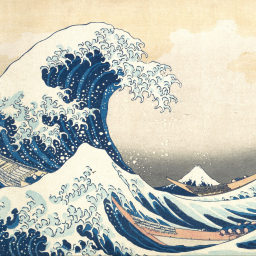

In [16]:
Image(data=wave_image)

In [29]:
wave_image_mask = open("./images/wave_image_mask.png", "rb").read()

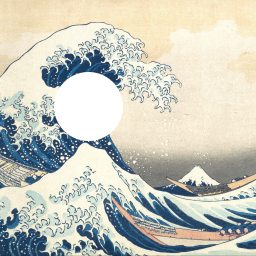

In [23]:
Image(data=wave_image_mask)

In [24]:
response = openai.Image.create_edit(
    image=wave_image,
    mask=wave_image_mask,
    size="256x256",
    prompt="a surfer riding a surfboard on the great wave",
    n=1
)

In [25]:
save_image(response["data"][0]["url"], f"wave_image_edited.png")

In [31]:
wave_image_edited = open("./images/wave_image_edited.png", "rb").read()

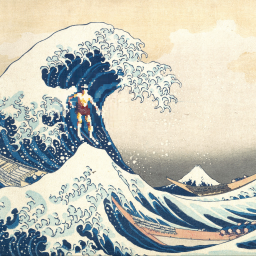

In [32]:
Image(data=wave_image_edited)